In [1]:
# importing modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#from functions import sns_ycount, sns_xcount
from functools import reduce
from datetime import datetime

In [2]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
links_df = pd.read_csv('links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
tags_df = pd.read_csv('tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

In [7]:
# Display the first five rows of the merged dataset
print("Merged_df head:")
print("============================")
merged_df.head()

Merged_df head:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
print("Merged Dataset Shape:")
print("==========================")
print("Number of Rows:", merged_df.shape[0])
print("Number of Columns:", merged_df.shape[1])

Merged Dataset Shape:
Number of Rows: 100836
Number of Columns: 6


In [9]:
merged_df.drop(['timestamp'],axis=1)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


## Univariate analysis

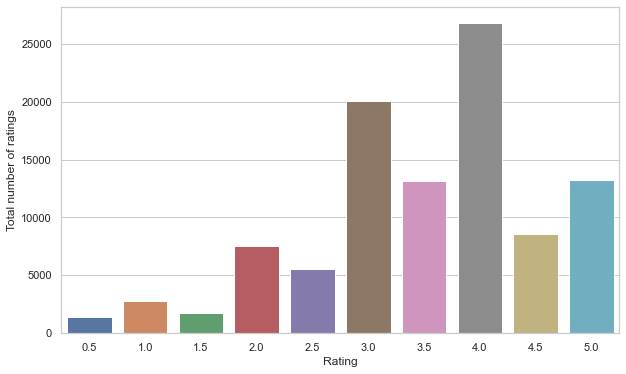

In [10]:
# Check the distribution of the rating
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Rating' is the column in your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="rating", data=merged_df)

ax.set_ylabel("Total number of ratings")
ax.set_xlabel("Rating")

plt.show()

In [11]:
def find_genres(movies_df):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# usage:
genre_counts = find_genres(movies_df)
genre_counts

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

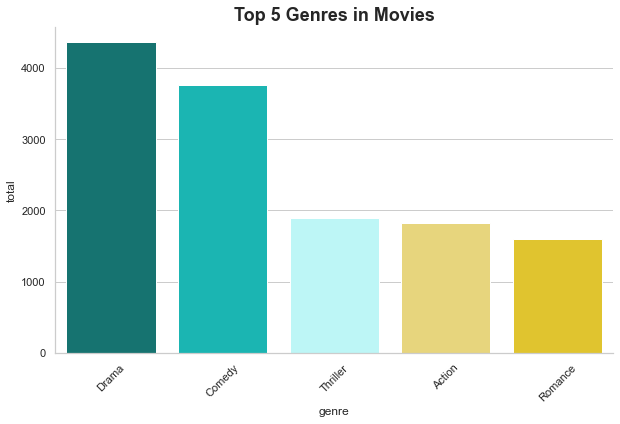

In [12]:
# Create a DataFrame from the genre_counts dictionary
df_plot = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['total']).reset_index()
df_plot = df_plot.rename(columns={'index': 'genre'})

# Sort the DataFrame by 'total' in descending order
df_plot = df_plot.sort_values(by='total', ascending=False)

# Set the number of top genres to display
top_n_genres = 5

# Create the bar plot for the top 5 genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot.head(top_n_genres), x='genre', y='total', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight='bold')
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


## Bivariate

In [13]:
#Analysis of rating given by the user 

no_of_rated_movies_per_user = merged_df.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_movies_per_user

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
569      20
194      20
147      20
406      20
442      20
Name: rating, Length: 610, dtype: int64

In [14]:
no_of_rated_movies_per_user.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

In [15]:
# mean rating for each movie title
mean_ratings = pd.DataFrame(merged_df.groupby('title')['rating'].mean())

# total number of ratings for each movie title
total_ratings = pd.DataFrame(merged_df.groupby('title')['rating'].count())

# Renaming the 'rating' column to 'mean ratings' for clarity
mean_ratings.rename(columns={'rating': 'mean ratings'}, inplace=True)

# Add the 'total ratings' column to the 'mean_ratings' DataFrame
mean_ratings['total ratings'] = total_ratings

## Modelling

In [16]:
from surprise.prediction_algorithms import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import SVD

In [17]:
## Perform a gridsearch with SVD
# ⏰ This cell may take several minutes to run
#params = {'n_factors': [20, 50, 100],
         #'reg_all': [0.02, 0.05, 0.1]}
#g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
#g_s_svd.fit(data)

User-Item matrix

In [18]:
# pivot table to transform the merged DataFrame into a user-item matrix
pivot_matrix = merged_df.pivot_table(
    index='userId',        # Rows will be indexed by 'userId'
    columns='title',       # Columns will be indexed by 'title'
    values='rating'        # The values in the matrix will be 'rating'
)

# print the first 10 rows of the `pivot_matrix`
pivot_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


User Preferences

In [19]:
#  copy user matrix
user_matrix = pivot_matrix.copy()

# Fill the NaN values in each row with the corresponding user's mean rating
# allows us to calculate the Pearson correlation between users
# For unrated movies, we assume the average rating of the user
user_matrix = user_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Print the first 5 rows of the updated user utility matrix
user_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [20]:
user_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,1.000000e+00,-8.476071e-25,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,-5.534891e-23,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-3.345291e-23,-3.088913e-23,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,-8.476071e-25,1.000000e+00,-0.011260,-0.031539,0.004800,3.308497e-25,-0.032471,5.123183e-25,2.203980e-25,...,-0.004904,-0.016117,0.017749,3.085290e-25,-1.430628e-03,-0.037289,-0.007789,-0.013001,7.905178e-25,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,-1.950809e-24,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075464
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021860
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054454


In [21]:
user_corr_matrix = user_matrix.T.corr()

In [22]:
# Calculate correlations for the target user (e.g., User 5)
target_user_id = 5
user_corr_target = user_corr_matrix[target_user_id]

# Sort the correlations in descending order
user_corr_target_sorted = user_corr_target.sort_values(ascending=False)
user_corr_target_sorted.head()

userId
5      1.000000
145    0.374631
35     0.301256
565    0.252757
134    0.232931
Name: 5, dtype: float64

Similar users

In [23]:
k = 100  # my preference value
top_similar_users = user_corr_target_sorted.iloc[1:k+1].index

Predict movie rating

Predicted rating = Sum of [ (correlation weights) * (user ratings) ] / Sum of (correlation weights)

Recommend top movies

In [24]:
from surprise import Dataset, Reader, KNNBasic
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns: userId, movieId, rating
# Load data into Surprise's Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Build a user-based collaborative filtering model using k-NN
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
trainset = data.build_full_trainset()
model.fit(trainset)

def recommend_top_movies(target_user_id, n=5):
    # Get all movie IDs that the user has not yet rated
    unrated_movies = merged_df[~merged_df['movieId'].isin(merged_df[merged_df['userId'] == target_user_id]['movieId'])]

    # Create a list to store movie recommendations with titles and predicted ratings
    recommendations = []

    for _, row in unrated_movies.iterrows():
        # Predict the rating for each unrated movie
        predicted_rating = model.predict(target_user_id, row['movieId']).est

        # Append the movie title and predicted rating to the recommendations list
        recommendations.append((row['title'], predicted_rating))

    # Sort the recommendations by predicted rating in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Select the top n recommendations
    top_n_recommendations = recommendations[:n]

    return top_n_recommendations

# Example usage
target_user_id = 5
top_movie_recommendations = recommend_top_movies(target_user_id, n=5)
print(f"Top 5 movie recommendations for User{target_user_id}: ")
print("==================================================")
for movie, rating in top_movie_recommendations:
    print(f"{movie}: Predicted Rating - {rating}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Top 5 movie recommendations for User5: 
The Jinx: The Life and Deaths of Robert Durst (2015): Predicted Rating - 5
Galaxy of Terror (Quest) (1981): Predicted Rating - 5
Alien Contamination (1980): Predicted Rating - 5
I'm the One That I Want (2000): Predicted Rating - 5
Elling (2001): Predicted Rating - 5


Item based

In [25]:
mean_ratings

,mean ratings,total ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [26]:
# row corresponding to the movie 'Terminator 2: Judgment Day (1991)' in the mean_ratings DataFrame
terminator_2_ratings = mean_ratings.loc[['Terminator 2: Judgment Day (1991)']]

# the mean ratings for 'Terminator 2: Judgment Day (1991)'
print("Mean Ratings for 'Terminator 2: Judgment Day (1991)':")
print(terminator_2_ratings)

Mean Ratings for 'Terminator 2: Judgment Day (1991)':
                                   mean ratings  total ratings
title                                                         
Terminator 2: Judgment Day (1991)      3.970982            224


In [27]:
# Make a copy of the original utility matrix
item_utility_matrix = pivot_matrix.copy()

# Display the first 10 rows of the item utility matrix
item_utility_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [28]:
from surprise import KNNWithMeans, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import Reader, Dataset

# Load the dataset from the dataframe
data = merged_df[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)
# Create KNNWithMeans model
knn_model = KNNWithMeans()

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'RMSE on test set for knn model: {rmse}')


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8996
RMSE on test set for knn model: 0.8995990289086612


In [29]:
from surprise import KNNWithMeans, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import Reader, Dataset

# Load the dataset from the dataframe
data = merged_df[["movieId", "userId", "genres", "rating"]]
reader = Reader(rating_scale=(0.5, 5.0))
dataset = Dataset.load_from_df(data[["movieId", "userId", "rating"]], reader)

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=4)

# Define the parameter grid for grid search
param_grid = {'k': [20, 30, 40],  # Adjust these values based on your preference
              'sim_options': {'name': ['cosine', 'pearson'],
                              'user_based': [False]}}

# Create an instance of the KNNWithMeans algorithm
knn_model = KNNWithMeans()

# Create GridSearchCV object
grid_search = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE'], cv=3)

# Fit the grid search object to the data
grid_search.fit(dataset)

# Get the best parameters from the grid search
best_params = grid_search.best_params['rmse']
best_score = grid_search.best_score['rmse']


# Build the k-NN with means collaborative filtering model with the best parameters
knn_model = KNNWithMeans(k=best_params['k'], sim_options=best_params['sim_options'])

# Train the model on the training set
knn_model.fit(train_data)

# Make predictions on the test set
#predictions = knn_model.test(test_data)

# Evaluate the model's performance
#rmse = accuracy.rmse(predictions)
#print(f'Best Parameters: {best_params}')
#print(f'RMSE on test set: {rmse}')

# Use cross_validate with the Surprise Dataset
#from surprise.model_selection import cross_validate
#cv_knn_basic = cross_validate(knn_model, dataset, n_jobs=-1)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

In [30]:
# Make predictions on the test set
predictions = knn_model.test(test_data)

# Evaluate the model's performance
rmse = accuracy.rmse(predictions)
print(f'Best RMSE Score: {best_score}')
print(f'Best Parameters: {best_params}')
print(f'RMSE on test set: {rmse}')

RMSE: 0.9071
Best RMSE Score: 0.9079991924161716
Best Parameters: {'k': 40, 'sim_options': {'name': 'cosine', 'user_based': False}}
RMSE on test set: 0.9071180062540853


In [31]:
# Use cross_validate with the Surprise Dataset
from surprise.model_selection import cross_validate
#cv_knn_basic = cross_validate(knn_model, dataset, n_jobs=-1)
cv_results = cross_validate(knn_model, dataset, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8957  0.9031  0.9037  0.8950  0.9043  0.9003  0.0041  
Fit time          1.58    2.86    3.00    2.72    2.50    2.53    0.50    
Test time         6.42    8.30    8.56    8.16    8.66    8.02    0.82    


In [32]:
np.mean(cv_results['test_rmse'])

0.9003327013265023

## Making Recommendations

In [33]:
# User ID for which you want to make recommendations
user_id = 5

# Get a list of all movie IDs in your dataset
all_movie_ids = np.unique(merged_df['movieId'])

# Create a list to store predicted ratings for unrated movies
predicted_ratings = []

# Predict ratings for the user on unrated movies
for movie_id in all_movie_ids:
    # Check if the user has already rated the movie
    if not ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['movieId'] == movie_id)].empty:
        continue  # Skip if the user has rated the movie

    predicted_rating = knn_model.predict(user_id, movie_id)
    predicted_ratings.append((movie_id, predicted_rating.est))

# Sort the predicted ratings in descending order
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 movie recommendations
top_5_recommendations = predicted_ratings[:5]

# Display the top 5 recommended movies
#for movie_id, predicted_rating in top_5_recommendations:
    #movie_title = movies_df[merged_df['movieId'] == movie_id]['title'].values[0]
   # print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")
# Display the top 5 recommended movies
for movie_id, predicted_rating in top_5_recommendations:
    # Check if the condition results in a non-empty DataFrame
    if not movies_df[movies_df['movieId'] == movie_id].empty:
        movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        rounded_rating = round(predicted_rating, 1)
        print(f"Movie: {movie_title}, Predicted Rating: {rounded_rating}")
    else:
        print(f"Movie with ID {movie_id} not found in movies_df")
     



Movie: Lamerica (1994), Predicted Rating: 4.5
Movie: Hunted, The (1995), Predicted Rating: 4.3
Movie: Jeffrey (1995), Predicted Rating: 4.2
Movie: Leaving Las Vegas (1995), Predicted Rating: 4.2
Movie: Restoration (1995), Predicted Rating: 4.2
